In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('Heartbeat Dataset'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[0]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 832:
       break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
len(paths)

832

In [4]:
paths[:5]

['Heartbeat Dataset\\set_a\\artifact__201012172012.wav',
 'Heartbeat Dataset\\set_a\\artifact__201105040918.wav',
 'Heartbeat Dataset\\set_a\\artifact__201105041959.wav',
 'Heartbeat Dataset\\set_a\\artifact__201105051017.wav',
 'Heartbeat Dataset\\set_a\\artifact__201105060108.wav']

In [5]:
labels[:5]

['artifact', 'artifact', 'artifact', 'artifact', 'artifact']

In [6]:
df = pd.DataFrame()
df['sound'] = paths
df['label'] = labels

In [7]:
df.head()

sound     label
0  Heartbeat Dataset\set_a\artifact__201012172012...  artifact
1  Heartbeat Dataset\set_a\artifact__201105040918...  artifact
2  Heartbeat Dataset\set_a\artifact__201105041959...  artifact
3  Heartbeat Dataset\set_a\artifact__201105051017...  artifact
4  Heartbeat Dataset\set_a\artifact__201105060108...  artifact

In [8]:
df.tail()

sound   label
827  Heartbeat Dataset\set_b\normal__296_1311682952...  normal
828  Heartbeat Dataset\set_b\normal__296_1311682952...  normal
829  Heartbeat Dataset\set_b\normal__298_1311685888...  normal
830  Heartbeat Dataset\set_b\normal__299_1311770522...  normal
831  Heartbeat Dataset\set_b\normal__300_1311772096...  normal

In [9]:
df.sample(10)

sound            label
690  Heartbeat Dataset\set_b\normal__150_1306776340...           normal
667  Heartbeat Dataset\set_b\normal__139_1306519274...           normal
691  Heartbeat Dataset\set_b\normal__151_1306779785...           normal
75    Heartbeat Dataset\set_a\murmur__201101051114.wav           murmur
226  Heartbeat Dataset\set_b\Bunlabelledtest__139_1...  bunlabelledtest
479  Heartbeat Dataset\set_b\murmur__197_1308141235...           murmur
388  Heartbeat Dataset\set_b\extrastole__194_130813...       extrastole
158  Heartbeat Dataset\set_a\unlabelledtest__201108...   unlabelledtest
125   Heartbeat Dataset\set_a\normal__201105021654.wav           normal
826  Heartbeat Dataset\set_b\normal__295_1311682673...           normal

In [10]:
df.sample(30)

sound            label
200  Heartbeat Dataset\set_b\Bunlabelledtest__118_1...  bunlabelledtest
519  Heartbeat Dataset\set_b\normal_noisynormal_108...           normal
663  Heartbeat Dataset\set_b\normal__134_1306428161...           normal
271  Heartbeat Dataset\set_b\Bunlabelledtest__169_1...  bunlabelledtest
806  Heartbeat Dataset\set_b\normal__270_1309369533...           normal
51   Heartbeat Dataset\set_a\Aunlabelledtest__20110...  aunlabelledtest
669  Heartbeat Dataset\set_b\normal__140_1306519735...           normal
381  Heartbeat Dataset\set_b\extrastole__153_130684...       extrastole
286  Heartbeat Dataset\set_b\Bunlabelledtest__180_1...  bunlabelledtest
9    Heartbeat Dataset\set_a\artifact__201106010602...         artifact
679  Heartbeat Dataset\set_b\normal__146_1306778707...           normal
736  Heartbeat Dataset\set_b\normal__179_1307990076...           normal
495  Heartbeat Dataset\set_b\murmur__244_1309198148...           murmur
183  Heartbeat Dataset\set_b\Bunlabelledtest__106_1...  bunlabelledtest
258  Heartbeat Dataset\set_b\Bunlabelledtest__159_1...  bunlabelledtest
788  Heartbeat Dataset\set_b\normal__232_1308748524...           normal
489  Heartbeat Dataset\set_b\murmur__239_1309195730...           murmur
86    Heartbeat Dataset\set_a\murmur__201108222224.wav           murmur
462  Heartbeat Dataset\set_b\murmur__165_1307109069...           murmur
143  Heartbeat Dataset\set_a\unlabelledtest__201106...   unlabelledtest
530  Heartbeat Dataset\set_b\normal_noisynormal_115...           normal
410  Heartbeat Dataset\set_b\extrastole__261_130935...       extrastole
331  Heartbeat Dataset\set_b\Bunlabelledtest__237_1...  bunlabelledtest
700  Heartbeat Dataset\set_b\normal__154_1306935608...           normal
641  Heartbeat Dataset\set_b\normal__107_1305654946...           normal
78    Heartbeat Dataset\set_a\murmur__201102052338.wav           murmur
195  Heartbeat Dataset\set_b\Bunlabelledtest__115_1...  bunlabelledtest
742  Heartbeat Dataset\set_b\normal__183_1308072703...           normal
603  Heartbeat Dataset\set_b\normal_noisynormal_173...           normal
142  Heartbeat Dataset\set_a\unlabelledtest__201106...   unlabelledtest

In [11]:
df['label'].value_counts()

label
normal             351
bunlabelledtest    195
murmur             129
extrastole          46
artifact            40
unlabelledtest      38
extrahls            19
aunlabelledtest     14
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

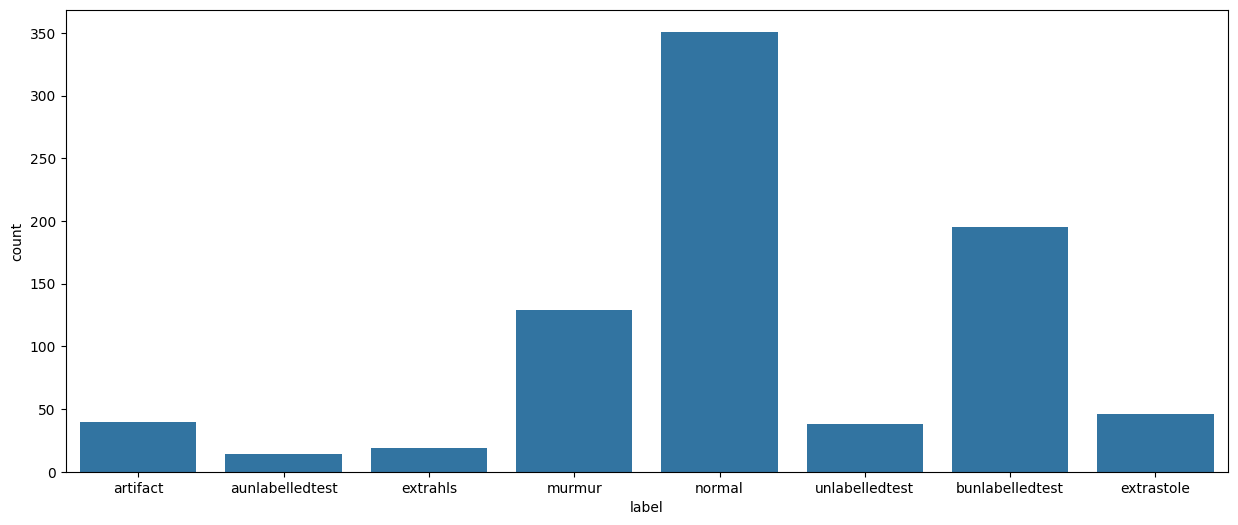

In [12]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='label')

In [13]:
def waveplot(data, sr, audio):
    plt.figure(figsize=(10,4))
    plt.title(audio, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
def spectogram(data, sr, audio):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(audio, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

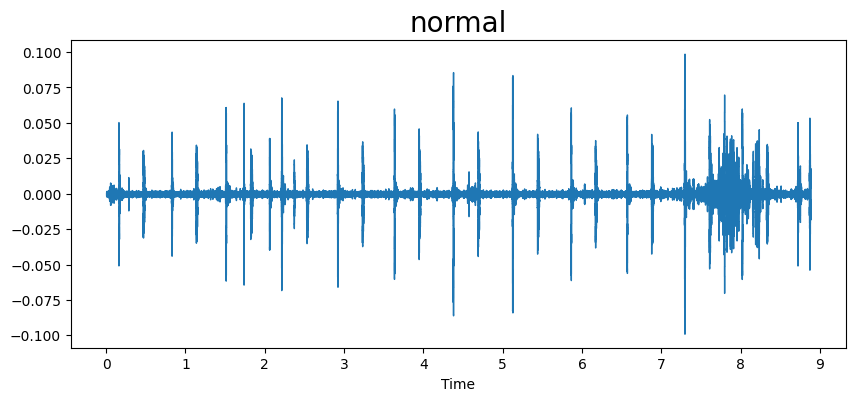

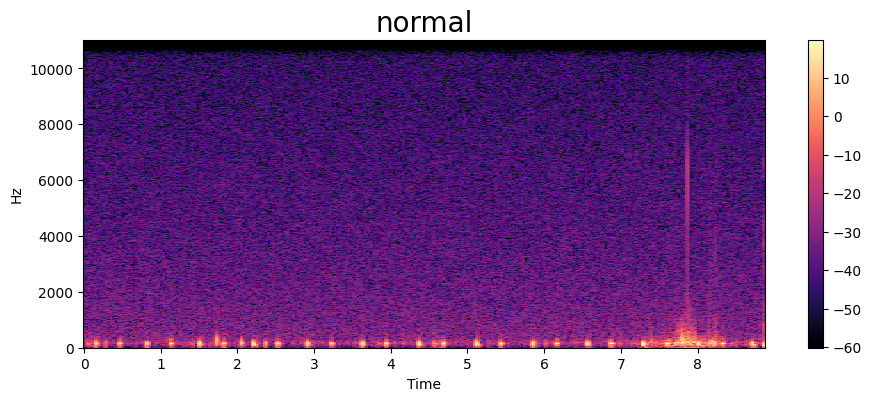

In [14]:
audio = 'normal'
path = np.array(df['sound'][df['label']==audio])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, audio)
spectogram(data, sampling_rate, audio)
Audio(path)

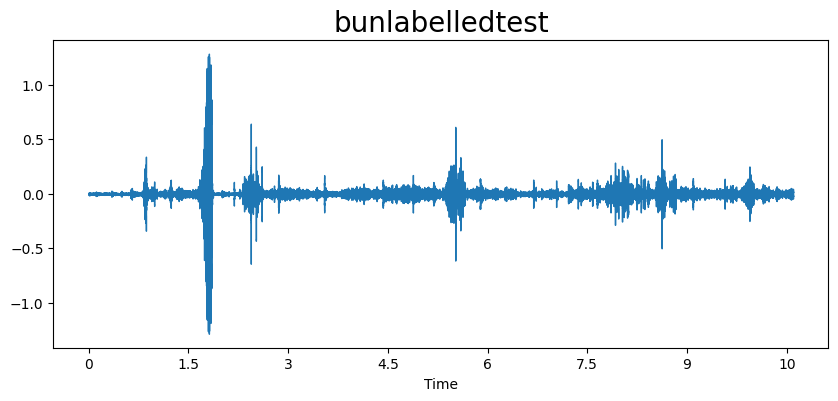

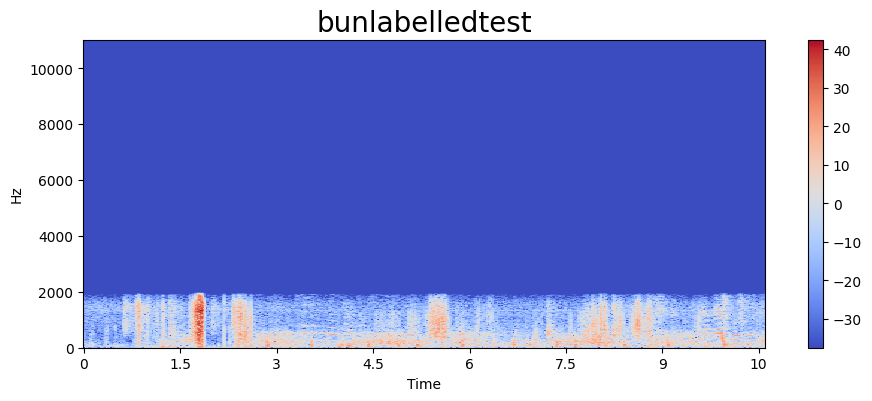

In [15]:
audio = 'bunlabelledtest'
path = np.array(df['sound'][df['label']==audio])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, audio)
spectogram(data, sampling_rate, audio)
Audio(path)

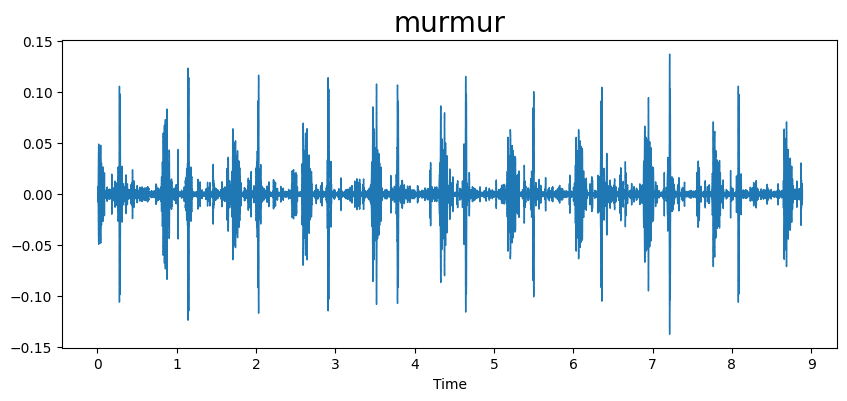

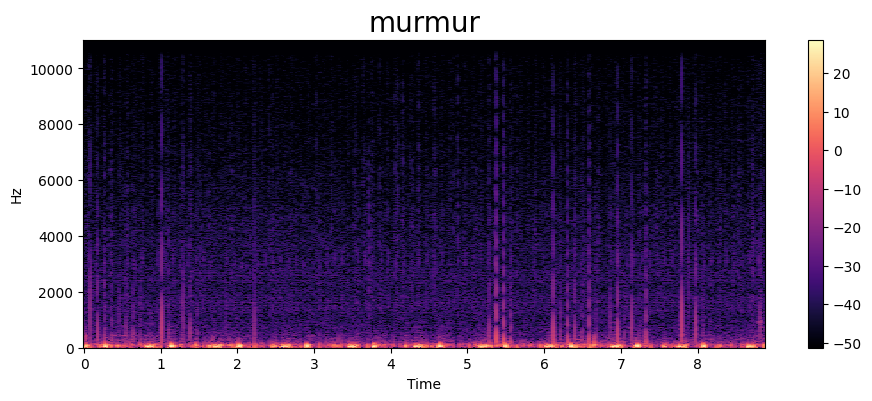

In [16]:
audio = 'murmur'
path = np.array(df['sound'][df['label']==audio])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, audio)
spectogram(data, sampling_rate, audio)
Audio(path)

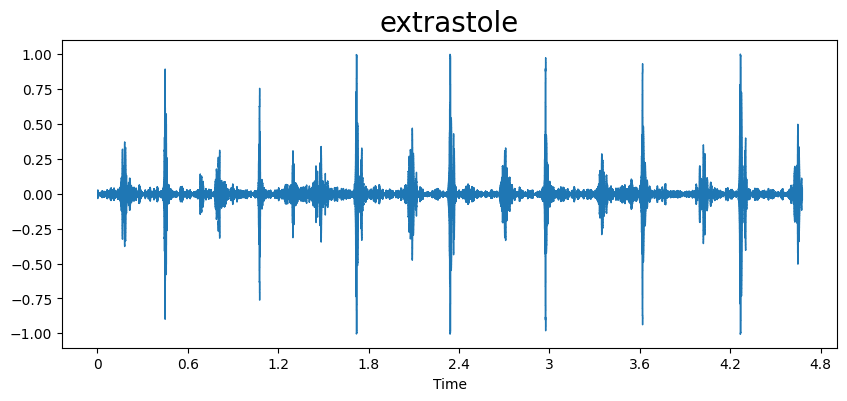

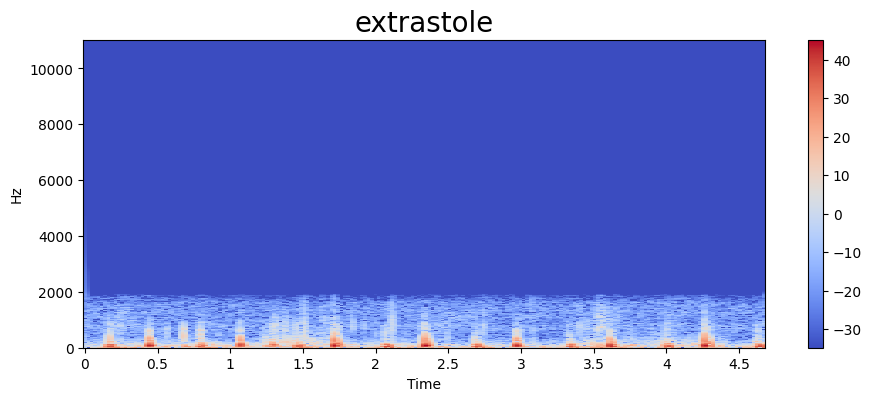

In [17]:
audio = 'extrastole'
path = np.array(df['sound'][df['label']==audio])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, audio)
spectogram(data, sampling_rate, audio)
Audio(path)

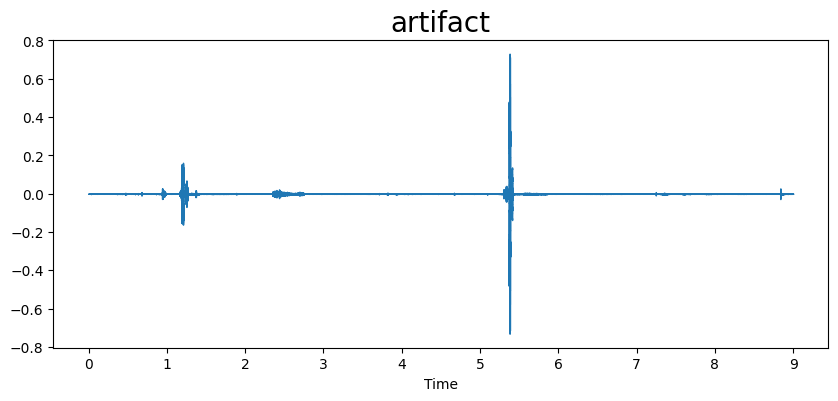

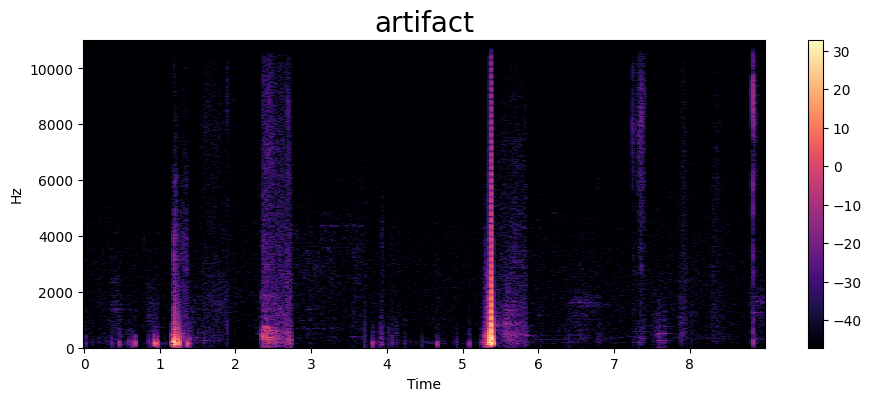

In [18]:
audio = 'artifact'
path = np.array(df['sound'][df['label']==audio])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, audio)
spectogram(data, sampling_rate, audio)
Audio(path)

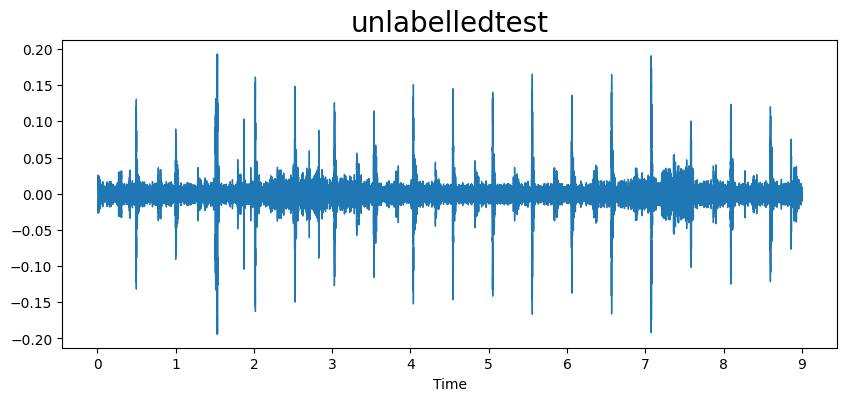

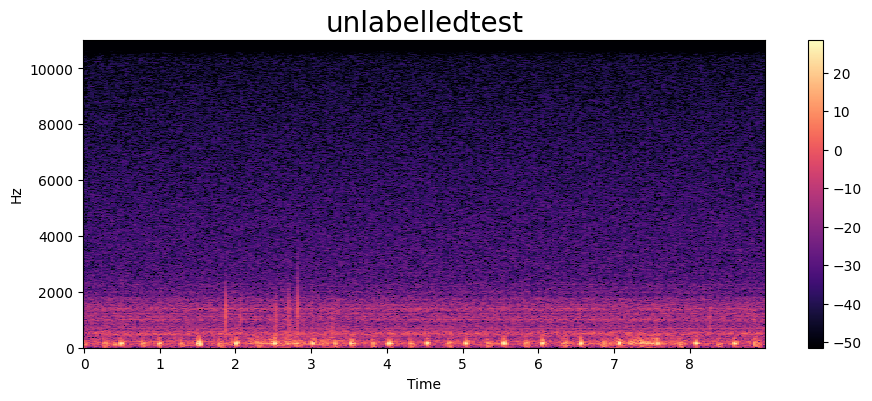

In [19]:
audio = 'unlabelledtest'
path = np.array(df['sound'][df['label']==audio])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, audio)
spectogram(data, sampling_rate, audio)
Audio(path)

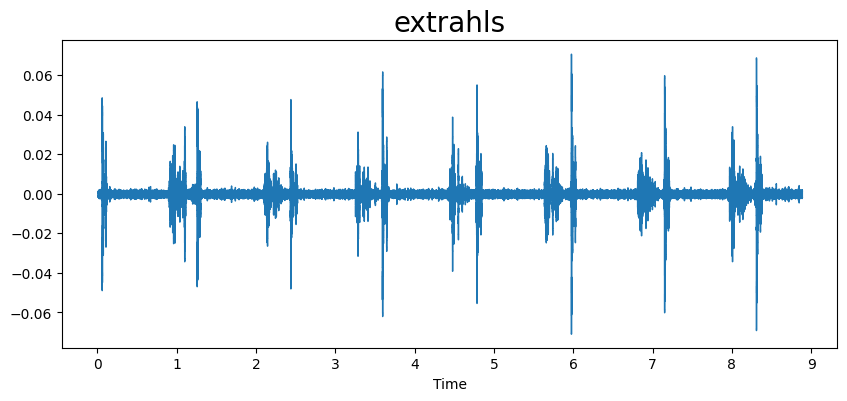

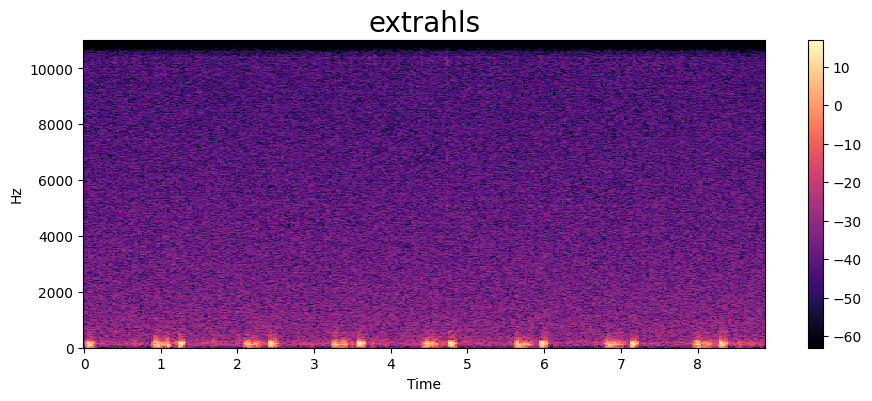

In [20]:
audio = 'extrahls'
path = np.array(df['sound'][df['label']==audio])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, audio)
spectogram(data, sampling_rate, audio)
Audio(path)

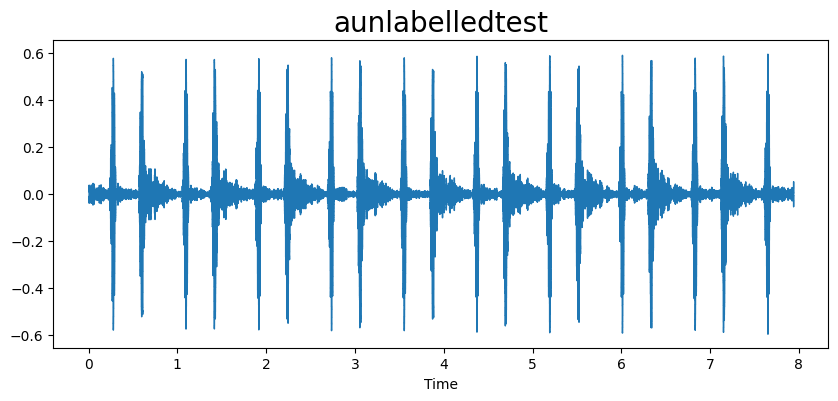

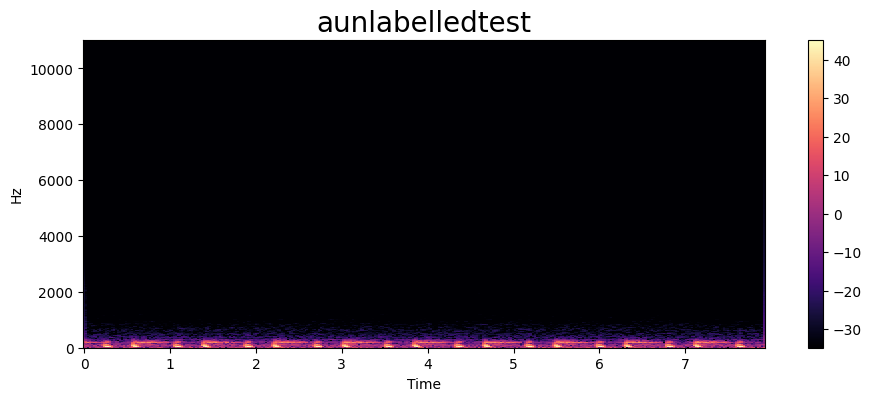

In [21]:
audio = 'aunlabelledtest'
path = np.array(df['sound'][df['label']==audio])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, audio)
spectogram(data, sampling_rate, audio)
Audio(path)

In [22]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [23]:
extract_mfcc(df['sound'][0])

array([-5.85283630e+02,  5.56701469e+01, -7.24515021e-01,  1.50119190e+01,
        1.75972569e+00,  2.19967937e+00, -2.02384305e+00, -2.34956288e+00,
       -4.39944601e+00, -2.17103615e-01, -4.16689587e+00, -1.63007605e+00,
       -3.96164560e+00, -2.05026293e+00, -3.65577054e+00, -2.19951773e+00,
       -3.70075583e+00, -1.33221853e+00, -2.68523312e+00, -2.57662255e-02,
       -9.20592546e-01, -2.27826983e-01, -1.46834219e+00, -1.94950771e+00,
       -2.09880733e+00, -4.63438272e-01, -7.09993839e-01,  1.75362483e-01,
       -1.19550204e+00, -1.02317445e-01, -4.48382139e-01,  3.47552374e-02,
       -1.33745682e+00, -5.71278930e-02, -6.83265507e-01, -1.78354472e-01,
        3.01413909e-02,  1.04834044e+00,  1.63522601e-01,  9.82816160e-01],
      dtype=float32)

In [24]:
X_mfcc = df['sound'].apply(lambda x: extract_mfcc(x))

In [25]:
X_mfcc

0      [-585.2836, 55.670147, -0.724515, 15.011919, 1...
1      [-1075.0514, -38.902035, 33.93373, -29.712767,...
2      [-581.81055, 23.360502, -7.9562116, -4.480217,...
3      [-304.856, 103.19672, -6.4516244, 24.31359, -1...
4      [-324.33456, 98.730576, -10.14966, 5.9768424, ...
                             ...                        
827    [-384.13705, 178.1046, 52.233418, 1.2743057, 2...
828    [-358.16403, 173.4507, 54.935463, -2.0920115, ...
829    [-390.4448, 177.10574, 54.892826, -6.99466, 8....
830    [-386.69797, 172.12106, 42.958393, -18.969225,...
831    [-403.02826, 160.76674, 30.284014, -25.823103,...
Name: sound, Length: 832, dtype: object

In [26]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(832, 40)

In [27]:
y=np.array(df['label'].tolist())

In [28]:
y.shape

(832,)

In [29]:
X

array([[-5.8528363e+02,  5.5670147e+01, -7.2451502e-01, ...,
         1.0483404e+00,  1.6352260e-01,  9.8281616e-01],
       [-1.0750514e+03, -3.8902035e+01,  3.3933731e+01, ...,
         1.4417102e+00, -1.6433789e+00,  1.5237134e+00],
       [-5.8181055e+02,  2.3360502e+01, -7.9562116e+00, ...,
         1.8785828e+00, -6.2905496e-01,  1.9005616e+00],
       ...,
       [-3.9044479e+02,  1.7710574e+02,  5.4892826e+01, ...,
         1.9153501e+00,  2.1818454e+00, -4.6829787e-01],
       [-3.8669797e+02,  1.7212106e+02,  4.2958393e+01, ...,
        -2.8188937e+00, -1.7061763e-02,  6.1103988e-01],
       [-4.0302826e+02,  1.6076674e+02,  3.0284014e+01, ...,
         1.2258112e+00,  8.7739569e-01, -1.6833148e+00]], dtype=float32)

In [30]:
y

array(['artifact', 'artifact', 'artifact', 'artifact', 'artifact',
       'artifact', 'artifact', 'artifact', 'artifact', 'artifact',
       'artifact', 'artifact', 'artifact', 'artifact', 'artifact',
       'artifact', 'artifact', 'artifact', 'artifact', 'artifact',
       'artifact', 'artifact', 'artifact', 'artifact', 'artifact',
       'artifact', 'artifact', 'artifact', 'artifact', 'artifact',
       'artifact', 'artifact', 'artifact', 'artifact', 'artifact',
       'artifact', 'artifact', 'artifact', 'artifact', 'artifact',
       'aunlabelledtest', 'aunlabelledtest', 'aunlabelledtest',
       'aunlabelledtest', 'aunlabelledtest', 'aunlabelledtest',
       'aunlabelledtest', 'aunlabelledtest', 'aunlabelledtest',
       'aunlabelledtest', 'aunlabelledtest', 'aunlabelledtest',
       'aunlabelledtest', 'aunlabelledtest', 'extrahls', 'extrahls',
       'extrahls', 'extrahls', 'extrahls', 'extrahls', 'extrahls',
       'extrahls', 'extrahls', 'extrahls', 'extrahls', 'extrahls',
     

In [31]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [32]:
X_resampled.shape

(2808, 40)

In [33]:
 y_resampled.shape

(2808,)

In [34]:
X_resampled

array([[-5.8528363e+02,  5.5670147e+01, -7.2451502e-01, ...,
         1.0483404e+00,  1.6352260e-01,  9.8281616e-01],
       [-1.0750514e+03, -3.8902035e+01,  3.3933731e+01, ...,
         1.4417102e+00, -1.6433789e+00,  1.5237134e+00],
       [-5.8181055e+02,  2.3360502e+01, -7.9562116e+00, ...,
         1.8785828e+00, -6.2905496e-01,  1.9005616e+00],
       ...,
       [-3.5293704e+02,  1.2330083e+02, -1.0489901e+01, ...,
         1.3410777e+00, -5.2157515e-01,  7.5064605e-01],
       [-4.5838062e+02,  9.2542114e+01,  1.9514034e+01, ...,
         1.0219886e+00, -8.4467131e-01,  1.1574057e+00],
       [-5.6035736e+02,  8.5959351e+01,  6.3303204e+00, ...,
         8.1416225e-01, -1.1299469e+00,  7.3431641e-01]], dtype=float32)

In [35]:
y_resampled

array(['artifact', 'artifact', 'artifact', ..., 'unlabelledtest',
       'unlabelledtest', 'unlabelledtest'], dtype='<U15')

In [36]:
np.unique(y, return_counts=True)

(array(['artifact', 'aunlabelledtest', 'bunlabelledtest', 'extrahls',
        'extrastole', 'murmur', 'normal', 'unlabelledtest'], dtype='<U15'),
 array([ 40,  14, 195,  19,  46, 129, 351,  38], dtype=int64))

In [37]:
np.unique(y_resampled, return_counts=True)

(array(['artifact', 'aunlabelledtest', 'bunlabelledtest', 'extrahls',
        'extrastole', 'murmur', 'normal', 'unlabelledtest'], dtype='<U15'),
 array([351, 351, 351, 351, 351, 351, 351, 351], dtype=int64))

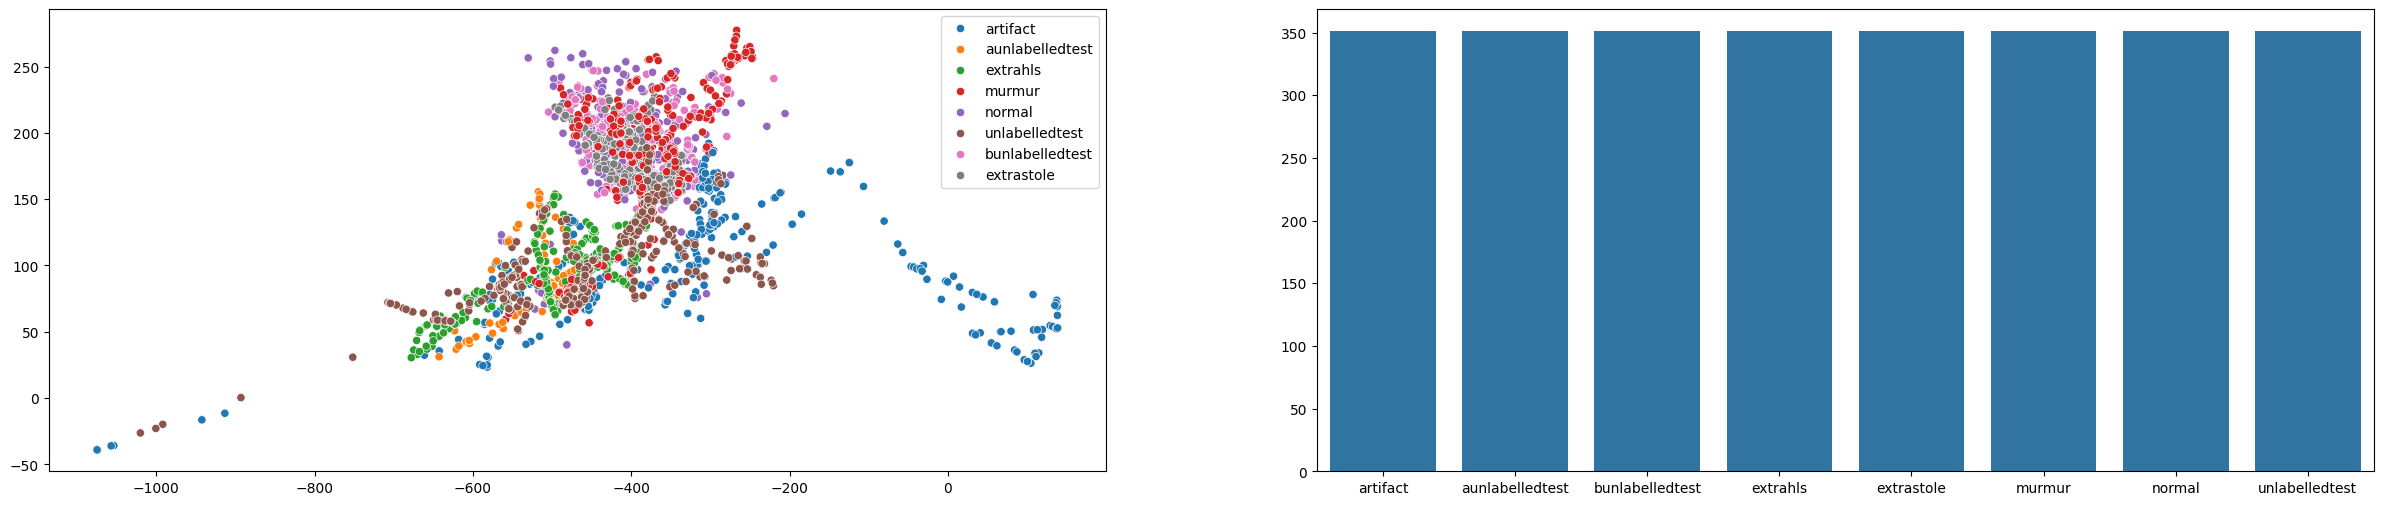

In [38]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(30,6))
sns.scatterplot(x=X_resampled[:,0], y=X_resampled[:,1], hue=y_resampled, ax=ax[0])
idx, c=np.unique(y_resampled, return_counts=True)
sns.barplot(x=idx, y=c, ax=ax[1])
plt.show()

In [39]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y_resampled=to_categorical(labelencoder.fit_transform(y_resampled))

In [40]:
y_resampled.shape

(2808, 8)

In [41]:
X_resampled

array([[-5.8528363e+02,  5.5670147e+01, -7.2451502e-01, ...,
         1.0483404e+00,  1.6352260e-01,  9.8281616e-01],
       [-1.0750514e+03, -3.8902035e+01,  3.3933731e+01, ...,
         1.4417102e+00, -1.6433789e+00,  1.5237134e+00],
       [-5.8181055e+02,  2.3360502e+01, -7.9562116e+00, ...,
         1.8785828e+00, -6.2905496e-01,  1.9005616e+00],
       ...,
       [-3.5293704e+02,  1.2330083e+02, -1.0489901e+01, ...,
         1.3410777e+00, -5.2157515e-01,  7.5064605e-01],
       [-4.5838062e+02,  9.2542114e+01,  1.9514034e+01, ...,
         1.0219886e+00, -8.4467131e-01,  1.1574057e+00],
       [-5.6035736e+02,  8.5959351e+01,  6.3303204e+00, ...,
         8.1416225e-01, -1.1299469e+00,  7.3431641e-01]], dtype=float32)

In [42]:
y_resampled

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [43]:
X_resampled.shape

(2808, 40)

In [44]:
y_resampled.shape

(2808, 8)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=0)

In [46]:
X_train

array([[-4.7555356e+02,  7.5909378e+01,  6.5173653e+01, ...,
         1.6922212e+00,  1.2152947e+00,  9.1867626e-01],
       [-4.7184357e+02,  1.9643465e+02,  4.4209164e+01, ...,
         5.7708186e-01,  5.2006274e-01, -1.4540715e+00],
       [-6.4406537e+02,  4.6004311e+01, -6.2038856e+00, ...,
         1.2961484e+00, -1.1473655e+00,  2.0036392e+00],
       ...,
       [-3.8539792e+02,  1.3660495e+02,  3.5177731e+01, ...,
         6.2870282e-01, -8.4494460e-01, -1.2311556e+00],
       [-4.7279822e+02,  7.5075638e+01,  5.1776310e+01, ...,
         7.6823246e-01,  3.5750189e-01,  4.5483130e-01],
       [-4.7650192e+02,  7.0280426e+01,  6.0680061e+01, ...,
         6.2891299e-01,  3.5766396e-01,  3.4400424e-01]], dtype=float32)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2246, 40)
(562, 40)
(2246, 8)
(562, 8)


In [48]:
import tensorflow as tf

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from datetime import datetime
from sklearn import metrics

In [86]:
model=Sequential()

###first layer
model.add(Dense(100, input_shape=(40,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

###second layer
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

###third layer
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

###final layer
model.add(Dense(8))
model.add(Activation('softmax'))

In [87]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_29 (Activation)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_30 (Activation)           │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_31 (Activation)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 8)                   │             808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_32 (Activation)           │ (None, 8)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,808 (182.84 KB)

 Trainable params: 46,008 (179.72 KB)

 Non-trainable params: 800 (3.12 KB)

In [88]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [89]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 250
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/Heartbeat_audioclassification.keras',
                               verbose=1, save_best_only=True)

start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)
                                                                                                
duration = datetime.now() - start
print("Training time", duration)

Epoch 1/250
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3643 - loss: 1.7433
Epoch 1: val_loss improved from inf to 1.50909, saving model to saved_models/Heartbeat_audioclassification.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3663 - loss: 1.7358 - val_accuracy: 0.4591 - val_loss: 1.5091
Epoch 2/250
63/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5213 - loss: 1.1559
Epoch 2: val_loss improved from 1.50909 to 1.23261, saving model to saved_models/Heartbeat_audioclassification.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5217 - loss: 1.1559 - val_accuracy: 0.4662 - val_loss: 1.2326
Epoch 3/250
69/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5278 - loss: 1.1398
Epoch 3: val_loss improved from 1.23261 to 1.05185, saving model to saved_models/Heartbeat_audioclassification.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5280 - loss: 1.1382 - val_accuracy: 0.5107 - val_loss: 1.0519
Epoch 4/250
62/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

In [90]:
model.evaluate(X_test,y_test,verbose=0)

[0.4859813451766968, 0.8451957106590271]

In [97]:
filename="Heartbeat Dataset\set_b\Bunlabelledtest__101_1305030823364_D.wav"
y, sr = librosa.load(filename, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc=mfcc.reshape(1,-1)
print(mfcc)
print(mfcc.shape)
predicted_label=np.argmax(model.predict(mfcc), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[[-4.72171997e+02  1.93448792e+02  4.90768166e+01 -1.78982334e+01
   1.11785431e+01  4.31403961e+01  2.21669540e+01 -1.05643835e+01
  -7.80938768e+00  1.17523270e+01  1.01166258e+01 -6.37369204e+00
  -8.93072701e+00  2.18046641e+00  5.81360149e+00 -3.18505496e-01
  -1.43622494e+00  4.07235193e+00  4.40512609e+00 -1.51925290e+00
  -3.11547685e+00  1.44866109e+00  3.27636743e+00  9.09210071e-02
  -9.03025448e-01  2.47284818e+00  4.06059742e+00  1.40294707e+00
  -7.55656183e-01 -5.26913488e-03  7.25224912e-01  3.81900012e-01
   1.13817370e+00  2.29711437e+00  9.68096316e-01 -1.39059639e+00
  -8.88923645e-01  1.09255946e+00  1.20317824e-01 -2.34003210e+00]]
(1, 40)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
[2]


array(['bunlabelledtest'], dtype='<U15')

In [100]:
filename="Heartbeat Dataset\set_b\murmur__116_1306258689913_A.wav"
y, sr = librosa.load(filename, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc=mfcc.reshape(1,-1)
print(mfcc)
print(mfcc.shape)
predicted_label=np.argmax(model.predict(mfcc), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[[-4.08058594e+02  2.01761871e+02  6.38594131e+01 -6.57572794e+00
   1.09352846e+01  3.52841034e+01  1.60654697e+01 -1.14449387e+01
  -6.06688356e+00  1.44269686e+01  1.45341835e+01 -4.82056707e-01
  -3.35267901e+00  6.84454060e+00  1.00596075e+01  2.98184562e+00
   1.63947940e-01  5.10864878e+00  6.50065517e+00  9.64904785e-01
  -1.96506214e+00  1.75043011e+00  4.66146278e+00  2.39001441e+00
   6.76329210e-02  1.37266195e+00  2.67153144e+00  1.22739029e+00
  -1.63199723e-01  4.02117521e-01  7.01464713e-01 -1.11333996e-01
   3.11607599e-01  2.02929187e+00  1.90412188e+00 -3.11961591e-01
  -1.06366813e+00  5.17881215e-01  1.17593598e+00 -1.08988255e-01]]
(1, 40)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[6]


array(['normal'], dtype='<U15')

In [101]:
filename="Heartbeat Dataset\set_b\murmur__122_1306325762831_C.wav"
y, sr = librosa.load(filename, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc=mfcc.reshape(1,-1)
print(mfcc)
print(mfcc.shape)
predicted_label=np.argmax(model.predict(mfcc), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[[-4.7184357e+02  1.9643465e+02  4.4209164e+01 -2.4082542e+01
   9.9344425e+00  4.5990501e+01  2.6021833e+01 -5.2401209e+00
   2.2768678e-01  2.0126656e+01  1.5615690e+01 -2.9413733e+00
  -4.5433645e+00  7.6120877e+00  9.6888285e+00  1.1696950e+00
  -5.7543504e-01  5.2865691e+00  4.9855323e+00 -2.1488054e+00
  -4.0574584e+00  8.3929211e-01  2.6751845e+00 -4.0220007e-01
  -5.6154013e-01  3.3772283e+00  4.2411795e+00  6.7304295e-01
  -1.1270964e+00  3.3678788e-01  3.8127568e-01 -1.2489485e+00
   7.1774818e-02  3.6828284e+00  3.8594384e+00  4.2218086e-01
  -9.9220532e-01  5.7708186e-01  5.2006274e-01 -1.4540715e+00]]
(1, 40)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[5]


array(['murmur'], dtype='<U15')

In [102]:
filename="Heartbeat Dataset\set_b\extrastole__229_1308594979317_B.wav"
y, sr = librosa.load(filename, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc=mfcc.reshape(1,-1)
print(mfcc)
print(mfcc.shape)
predicted_label=np.argmax(model.predict(mfcc), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[[-404.43414    194.13982     42.57269    -27.270689     4.6255436
    40.54172     24.19878     -2.949049     2.1731234   17.322235
     9.6150465   -6.6588097   -3.8369799    9.298449     8.705506
    -1.8750418   -3.214086     3.58781      3.7819192   -1.9781964
    -1.9187363    2.8934672    2.270367    -2.202566    -0.7339806
     4.998844     4.6871815   -1.3142078   -2.8891075    1.6296976
     4.0012527    1.825914     1.0454751    2.88489      1.9765601
    -1.7684287   -1.9599338    2.1401534    3.7519255    0.6971175]]
(1, 40)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[4]


array(['extrastole'], dtype='<U15')

In [107]:
filename="Heartbeat Dataset\set_b\extrastole__229_1308594979317_B.wav"
y, sr = librosa.load(filename, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc=mfcc.reshape(1,-1)
print(mfcc)
print(mfcc.shape)
predicted_label=np.argmax(model.predict(mfcc), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[[-404.43414    194.13982     42.57269    -27.270689     4.6255436
    40.54172     24.19878     -2.949049     2.1731234   17.322235
     9.6150465   -6.6588097   -3.8369799    9.298449     8.705506
    -1.8750418   -3.214086     3.58781      3.7819192   -1.9781964
    -1.9187363    2.8934672    2.270367    -2.202566    -0.7339806
     4.998844     4.6871815   -1.3142078   -2.8891075    1.6296976
     4.0012527    1.825914     1.0454751    2.88489      1.9765601
    -1.7684287   -1.9599338    2.1401534    3.7519255    0.6971175]]
(1, 40)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[4]


array(['extrastole'], dtype='<U15')

In [110]:
filename=r"Heartbeat Dataset\set_a\normal__201103090635.wav"
y, sr = librosa.load(filename, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc=mfcc.reshape(1,-1)
print(mfcc)
print(mfcc.shape)
predicted_label=np.argmax(model.predict(mfcc), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[[-5.09797882e+02  7.08408127e+01  1.19630499e+01  2.74177132e+01
   1.15755825e+01  1.58948374e+01  7.92479324e+00  1.03368149e+01
   4.93577147e+00  7.97080088e+00  2.84635520e+00  6.41060352e+00
   6.82819188e-01  4.19622087e+00 -6.98551059e-01  3.39644170e+00
  -1.90112829e+00  2.30596399e+00 -2.43092179e+00  2.10472560e+00
  -2.12544394e+00  2.38803482e+00 -1.45757627e+00  1.97666490e+00
  -2.01555777e+00  1.06961870e+00 -2.49541712e+00  4.97440517e-01
  -2.27936220e+00  9.52181756e-01 -2.51702118e+00  1.91041112e+00
  -1.57487869e+00  1.45918739e+00 -1.71771991e+00  1.33207750e+00
  -1.72990835e+00  9.96946454e-01 -2.02645493e+00  7.38050818e-01]]
(1, 40)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[6]


array(['normal'], dtype='<U15')

In [111]:
filename=r"Heartbeat Dataset\set_a\unlabelledtest__201108011113 (5).wav"
y, sr = librosa.load(filename, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc=mfcc.reshape(1,-1)
print(mfcc)
print(mfcc.shape)
predicted_label=np.argmax(model.predict(mfcc), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[[-5.0076639e+02  1.4532770e+02  2.7105120e+01  2.8766676e+01
   8.5901146e+00  1.5802772e+01  5.3154168e+00  3.4781594e+00
  -1.6624154e+00 -2.4885347e+00 -4.6430507e+00 -3.7894268e+00
  -4.6004763e+00 -4.5238137e+00 -4.4420013e+00 -4.1617990e+00
  -4.8451834e+00 -5.1540828e+00 -5.0136709e+00 -4.7160878e+00
  -4.7612958e+00 -4.5231910e+00 -3.5370455e+00 -3.0437565e+00
  -2.0191531e+00 -2.4126432e+00 -2.3227208e+00 -1.5146524e+00
  -1.1254345e+00 -1.6902635e+00 -2.2307856e+00 -2.7554984e+00
  -1.9381588e+00 -1.4399330e-01  1.1037377e+00  1.0961738e+00
   1.3720644e-01 -1.0778202e+00 -7.5175381e-01  4.4598360e-02]]
(1, 40)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[7]


array(['unlabelledtest'], dtype='<U15')

In [ ]:
filename=
y, sr = librosa.load(filename, duration=3, offset=0.5)
mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
mfcc=mfcc.reshape(1,-1)
print(mfcc)
print(mfcc.shape)
predicted_label=np.argmax(model.predict(mfcc), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class